# Student Grade Prediction - MACHINE LEARNING

# AKEEM ASIRU
SUBMITTED TO DR. LONGO - EASTERN UNIVERSITY

## Overview

### Machine Learning Task
Suppose you work in the Advising Team for a large Portuguese school system, and your school director has asked you to analyze student data and create a machine learning model to predict a student’s performance based on select features. Your director hopes to use this information to identify students who might need additional assistance and interventions to improve their grades.

Your task is to create a regression model to predict a student's grade. You will need to clean and prepare the data to ensure it is suitable for analysis. After building the model, you will evaluate its performance using appropriate metrics to assess its accuracy and effectiveness.

### Note
Follow the instructions carefully and submit your notebook to CodeGrade for testing. Ensure you name the variables as indicated, as CodeGrade requires specific naming for proper evaluation.


## Introduction

Analysis of a dataset concerning the performance of some Portuguese students of secondary school and some personal information related to them. The aim is to create a machine learning model to predict a student’s performance based on selected important features that determine and influence the school performance of Portuguese students in the two main subjects Mathematics and Portuguese language. This is to be able to offer assistance to students with poor performance.

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

The value on which we try to make predictions is the one named G3, it is the feature that determines the success or failure of a student at the end of the school year.



## A. Get the Data

Begin by importing and inspecting your dataset to ensure it is correctly loaded and understand its structure. This initial step sets the foundation for your analysis and modeling.

1) **Import the Data**: Correctly import your data.
2) **Initial Data Check**: Check the initial data, including size and data types.
3) **Identify the Target**: Identify the target attribute.
4) **Split the Data**: Split your data into training and test sets using the variable names `X_train`, `X_test`, `y_train`, and `y_test`.  Use `test_size=0.2` and `random_state=42`.
5) **Comment Your Code**: Get into the habit of including comments in your code. Comments should explain <u>why</u> decisions were made, while the code should be clean enough to read and understand <u>what</u> the program does. 

<span style="color:red">Do not make changes to these training and test set DataFrames going forward. If you need to make changes, save them with a different name. CodeGrade will check them in their original form.</span>

*You may add additional markdown and code blocks to this template as needed.*

## A1.        Standard Imports<a name="import"></a>



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

## A2.         Import the Data<a name="data"></a>

Importing the data

In [10]:
student_record = pd.read_csv('student-mat.csv')   # importing csv file "student-mat.csv"
student_record.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,0.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,0.0,1.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,2.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,1.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


Checking basic info about dataset - size, data types

In [12]:
student_record.info() #Features and datatype description
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [13]:
student_record.columns # column names of all the features in the dataframe

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences_G1', 'absences_G2', 'absences_G3', 'G1',
       'G2', 'G3'],
      dtype='object')

In [14]:
student_record.shape #rows is 395, column is 35

(395, 35)

## Observation1: 
- There are 3 data type in the dataset: object, float64. int64
The dataset comprises 35 features , 395 records.
-- G3 is the dependent variable of int64 datatype
-- The independent variables that are of int64 datatypes are G2, G1, health, Walc, Dalc goout, freetime, famrel, Medu, Fedu, studytime, traveltime
and failure
-- The idependent variable that are of float datatype are absence_G1, absence_G2, absence_G3 and age
-- The independent varible that are of object datatype are school, sex, address,  femsup, famsize, Pstatus, Mjob, Fjob, reason, guardian,
schoolsup, paid, activitis, nursery, higher and romantic
-- float datatype features are 4
-- int64 datatype are 14
-- object datatype are 17

In [16]:
student_record.size #total number of elements. That is rows x columns. - 13825

13825

In [17]:
student_record.count() #total numbers of values/records of each features in the dataframe

school         395
sex            395
age            383
address        395
famsize        395
Pstatus        395
Medu           395
Fedu           395
Mjob           395
Fjob           395
reason         395
guardian       395
traveltime     395
studytime      395
failures       395
schoolsup      395
famsup         395
paid           395
activities     395
nursery        395
higher         395
internet       395
romantic       395
famrel         395
freetime       395
goout          395
Dalc           395
Walc           395
health         395
absences_G1    382
absences_G2    386
absences_G3    381
G1             395
G2             395
G3             395
dtype: int64

Checking the dataset for missing values

In [19]:

null_rows_idx = student_record.isnull().any(axis=1) # creating a Series of True/False values if there is a null value in a column


student_record.loc[null_rows_idx].head() # selecting only the rows with null values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,0.0,1.0,5,5,6
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,1,1,3,NaN,0.0,3.0,12,12,11
12,GP,M,15.0,U,LE3,T,4,4,health,services,...,3,1,3,5,0.0,0.0,NaN,14,14,14
18,GP,M,17.0,U,GT3,T,3,2,services,services,...,5,2,4,5,NaN,1.0,NaN,6,5,5


**Observations 2:**
- 5 rows out of 395 rows has missing values
- 4 Features i.e **Age**, **absences_G1**, **absences_G2**, and **absences_G3** has **missing values**



In [21]:
student_record.describe().T #Summary statistics of the data

,count,mean,std,min,25%,50%,75%,max
age,383.0,16.699739,1.280615,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


**Observation3**
*Reconfirmation that there are missing values in 4 columns: age, absences_G1, absences_G1, and absences_G3 because they are less than 395 records.
*50% of the students are 17 years of age and they study for an average of 2 hours per week. They have very good quality family relationshp with little or no alcohol consumption which ensures their good health. On the average they did not experience failure in the past and their parents' education is 5th to 9th grade on the average.

## A3. Identify the target Variable and independent Variables
"G3" is our target variable we are trying to predict

In [24]:
student_target = student_record['G3'] ## Attributes 'G3' is our target variable. This is the dependent variable we are predicting.
student_features = student_record.drop(['G3'], axis = 1) ## All independent variables

## A4. Split the data into training and test sets 


In [26]:
#Spliting the data into training and test sets using the variable names X_train, X_test, y_train, and y_test. Use test_size=0.2 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(student_features, student_target, test_size=0.2, random_state=42)

## B.  Explore the Data
Understanding your data is a crucial step before building any machine learning model. This exploration phase helps you identify patterns, detect anomalies, and uncover insights that will guide your modeling decisions. By thoroughly analyzing and visualizing the data, you can make informed choices on feature selection and preprocessing, ultimately improving your model's performance and reliability.

This section won't be automatically graded, but you must include your analytical insight and screenshots of your plots in the Executive Summary report.

In this section you should:
1) **Study Attributes**: Thoroughly study the training set attributes and their characteristics.
2) **Visualizations**: Use visualizations to effectively analyze and explore your data. Be ready to explain what the visualization shows and why it is important.  
3) **Correlations**: Analyze correlations between your numeric attributes.

*CodeGrade will only have matplotlib and seaborn libraries loaded. You can use other libraries (e.g., Plotly) or use software (e.g., Tableau) for your visualizations, but comment out any code that is not matplotlib or seaborn before submitting to CodeGrade including import statements.*

You will include your analysis and at least three plots in your Executive Summary. Use either screenshots and paste them into your Executive Summary document or the `savefig()` method. Here's example code for saving a plot in different file formats:
```
import matplotlib.pyplot as plt

# Your plotting code here
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Sample Plot')

# Save the plot as a PNG file
plt.savefig('my_plot.png')

# Optionally, save in other formats
plt.savefig('my_plot.pdf')
plt.savefig('my_plot.jpg')
```

B1. Features Attributes and their Characteristics
We'll begin by checking the descriptive statistics

In [29]:
student_record.head() #First five records of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,0.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,0.0,1.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,2.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,1.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [30]:
### ENTER CODE HERE ## Count of all categorical variables using cross tabulation
All_categorical_var_col = student_record.select_dtypes(include= object) #Extraction of all categorical variables
df1 = All_categorical_var_col.melt(var_name='columns', value_name='index')
# Count values using crosstab
value_counts_crosstab = pd.crosstab(index=df1['index'], columns=df1['columns'])
value_counts_crosstab #value counts of all the categorical variables

columns,Fjob,Mjob,Pstatus,activities,address,famsize,famsup,guardian,higher,internet,nursery,paid,reason,romantic,school,schoolsup,sex
index,,,,,,,,,,,,,,,,,
A,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,208
GP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,349,0,0
GT3,0,0,0,0,0,281,0,0,0,0,0,0,0,0,0,0,0
LE3,0,0,0,0,0,114,0,0,0,0,0,0,0,0,0,0,0
M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187
MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0
R,0,0,0,0,88,0,0,0,0,0,0,0,0,0,0,0,0
T,0,0,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Observation 4** 
The record was obtained from two schools:  Gabriel Pereira with 349 students and, 46 students from Mousinho da Silveira. The female students in this analysis are 208 while the males are just 187. 354 of the students' parents are living together while 41 of the parents are either separated or divorced. Majority of the students, 273 students, have their mother as guardian as against 90 that has father as guardians. Further obsservation shows that majority of the students, 329, have access to the internet while only 66 students have no access. Majority of the students, 281, have a family size that is more than three. 307 are urban students as against 88 students from the rural area.
Surprisingly, only 51 students have extra educational support while 344 has no such previledge. Only 81 students did not passed through nursery school and just 20 students are not thinking of going to higher institution. 132 students have already been exposed to romantic relationship!

B2. Data Visualization

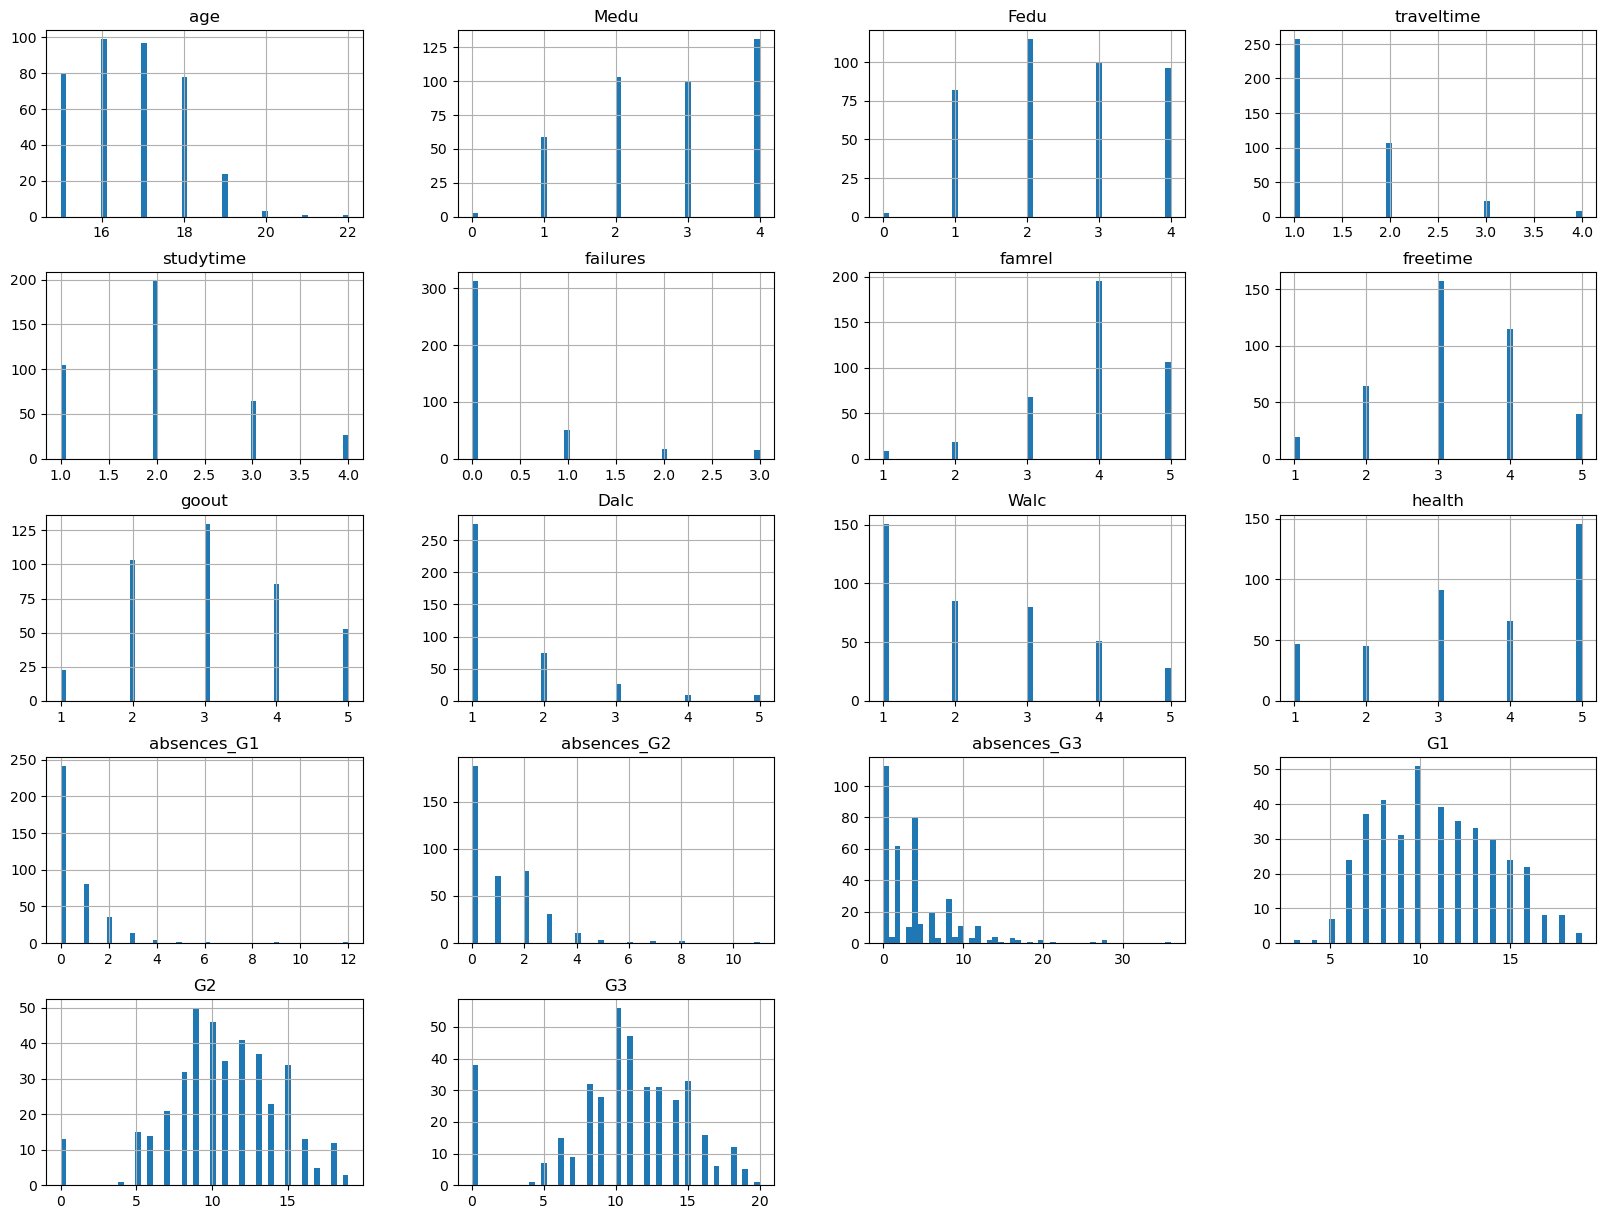

In [33]:
student_record.hist(bins=50, figsize=(20, 15))
plt.show()

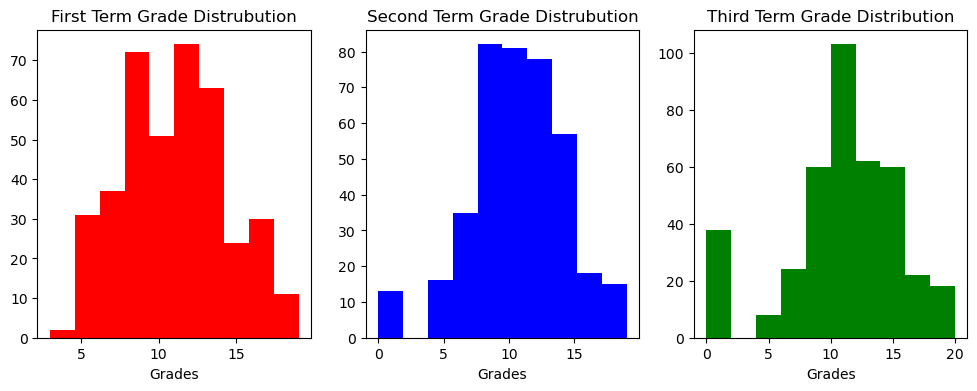

In [34]:
figure,axis= plt.subplots(1,3,figsize=(12,4))
G1score= student_record['G1']
G2score=student_record['G2']
G3score=student_record['G3']

# G1 score distribution graph

axis[0].hist(G1score,bins=10,color='red')
axis[0].set_title('First Term Grade Distrubution')
axis[0].set_xlabel('Grades')

# G2 score distribution graph

axis[1].hist(G2score,bins=10,color='blue')
axis[1].set_title('Second Term Grade Distrubution')
axis[1].set_xlabel('Grades')

# G3 score distribution graph

axis[2].hist(G3score,bins=10,color='green')
axis[2].set_title('Third Term Grade Distribution')
axis[2].set_xlabel('Grades')
plt.show()

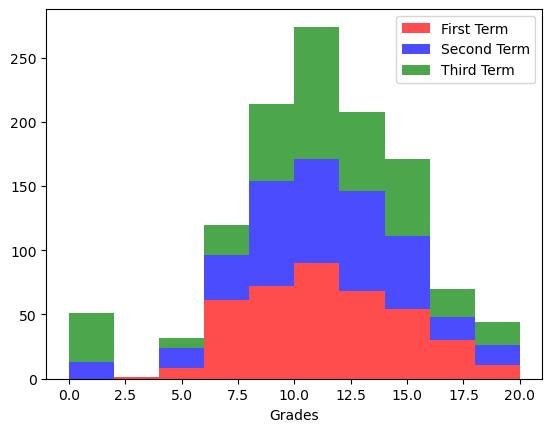

In [35]:


# Combined G1, G2 and G3 distribution graph
plt.hist([G1score,G2score,G3score],bins=10,stacked=True,alpha=0.7,color=['red','blue','green'])
plt.legend(['First Term','Second Term','Third Term'])
plt.xlabel('Grades')
plt.show()



In [36]:
#let us compare the performance of students in each school

student_record_df2= student_record.copy()
student_record_df2['G3_pass_fail']= student_record_df2['G3'].apply(lambda x: 'Pass' if x>= 10.0 else 'Fail')

school_results= pd.crosstab(student_record_df2['G3_pass_fail'],student_record_df2['school'])

school_results # 32.4% of the students in GP school failed while 37% of the students in MS school failed

school,GP,MS
G3_pass_fail,,
Fail,113,17
Pass,236,29


In [37]:
#let us compare the performance of students in term of gender for both school
results_sex= pd.crosstab(student_record_df2['G3_pass_fail'],student_record_df2['sex'])
results_sex # 36% of the female students failed while 29% of the male students failed

sex,F,M
G3_pass_fail,,
Fail,75,55
Pass,133,132


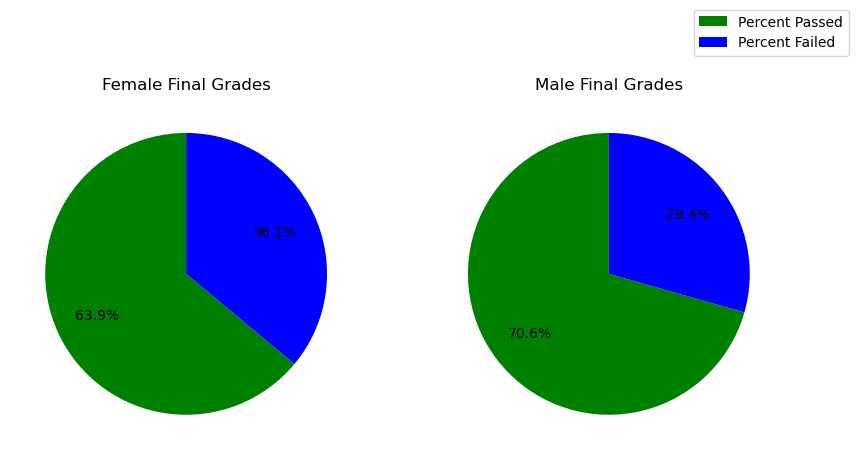

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

femalepassed= results_sex.iloc[1][0]
femalefailed=results_sex.iloc[0][0]
malepassed=results_sex.iloc[1][1]
malefailed= results_sex.iloc[0][1]

totalfemale= femalepassed+ femalefailed
totalmale= malepassed + malefailed

perc_female_passed= (femalepassed/totalfemale)* 100
perc_female_failed= (femalefailed/totalfemale) * 100
perc_male_passed = (malepassed/ totalmale) * 100
perc_male_failed= (malefailed/totalmale) * 100

sizes= [perc_female_passed,perc_female_failed]
ax1.pie(sizes,autopct='%1.1f%%',pctdistance=0.70,startangle=90,colors=['green','blue'])
ax1.set_title("Female Final Grades")


sizes= [perc_male_passed,perc_male_failed]
ax2.pie(sizes,autopct='%1.1f%%',pctdistance=0.70,startangle=90,colors=['green','blue'])
plt.legend(['Percent Passed','Percent Failed'],loc='lower right',bbox_to_anchor=(1.2,1.1))
ax2.set_title("Male Final Grades")

plt.show()

In [39]:
num_cols=['age','traveltime','studytime','failures','freetime','goout','Dalc','Walc','health','absences_G1','absences_G2','absences_G3','G1','G2','G3']
corr_matrix = student_record[num_cols].corr()
corr_matrix

,age,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
age,1.000000,0.071326,-0.008327,0.245332,0.005806,0.118420,0.137903,0.119580,-0.063560,0.156872,0.129578,0.194446,-0.063642,-0.134184,-0.152762
traveltime,0.071326,1.000000,-0.100909,0.092239,-0.017025,0.028540,0.138325,0.134116,0.007501,0.008575,0.026970,-0.025849,-0.093040,-0.153198,-0.117142
studytime,-0.008327,-0.100909,1.000000,-0.173563,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062752,-0.008449,-0.070547,0.160612,0.135880,0.097820
failures,0.245332,0.092239,-0.173563,1.000000,0.091987,0.124561,0.136047,0.141962,0.065827,0.047879,0.084028,0.042807,-0.354718,-0.355896,-0.360415
freetime,0.005806,-0.017025,-0.143198,0.091987,1.000000,0.285019,0.209001,0.147822,0.075733,-0.059824,-0.067343,-0.034438,0.012613,-0.013777,0.011307
goout,0.118420,0.028540,-0.063904,0.124561,0.285019,1.000000,0.266994,0.420386,-0.009577,0.021837,0.003026,0.063690,-0.149104,-0.162250,-0.132791
Dalc,0.137903,0.138325,-0.196019,0.136047,0.209001,0.266994,1.000000,0.647544,0.077180,0.086786,0.071613,0.130254,-0.094159,-0.064120,-0.054660
Walc,0.119580,0.134116,-0.253785,0.141962,0.147822,0.420386,0.647544,1.000000,0.092476,0.110439,0.056713,0.165874,-0.126179,-0.084927,-0.051939
health,-0.063560,0.007501,-0.075616,0.065827,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.017829,-0.029999,-0.041691,-0.073172,-0.097720,-0.061335
absences_G1,0.156872,0.008575,-0.062752,0.047879,-0.059824,0.021837,0.086786,0.110439,-0.017829,1.000000,0.666480,0.902445,-0.030857,-0.038391,0.008686


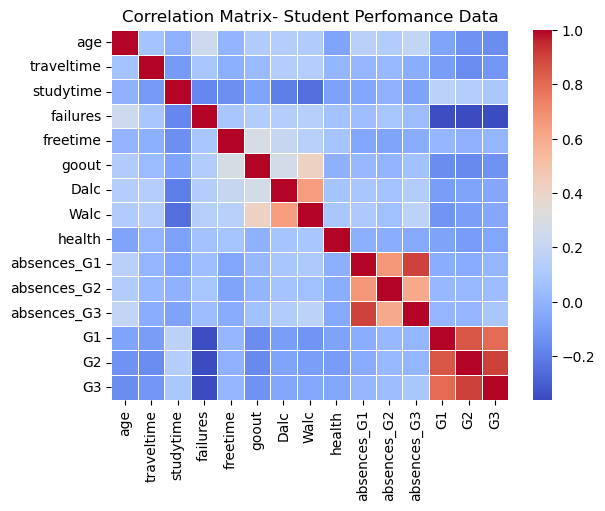

In [40]:
# Let us use seaborn to graph a heatmap for our correlation matrix.
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.7)
plt.title("Correlation Matrix- Student Perfomance Data")
plt.show()

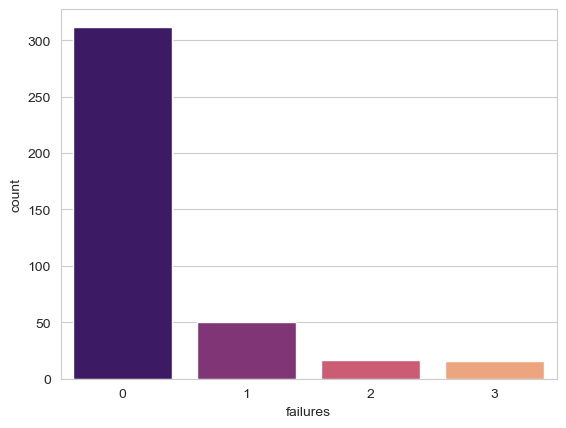

In [41]:
# Grade distribution by address
sns.set_style('whitegrid')
sns.countplot(x='failures',data=student_features,palette='magma') 
plt.show()

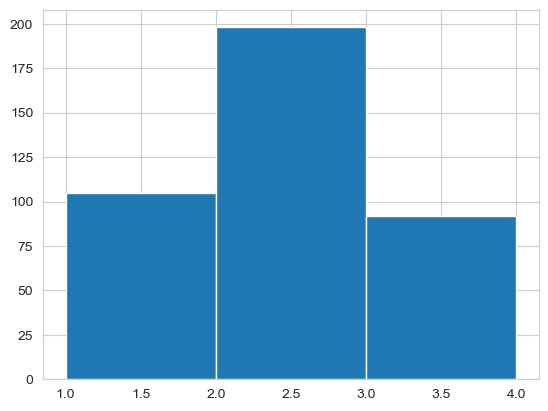

In [42]:
hist = student_features['studytime'].hist(bins=3)
plt.show()

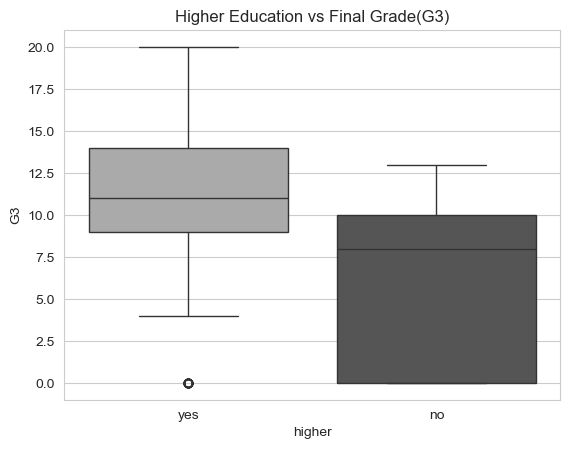

In [43]:
b = sns.boxplot(x=student_features['higher'],y=student_target,palette='binary')
b.axes.set_title('Higher Education vs Final Grade(G3)')
plt.show()

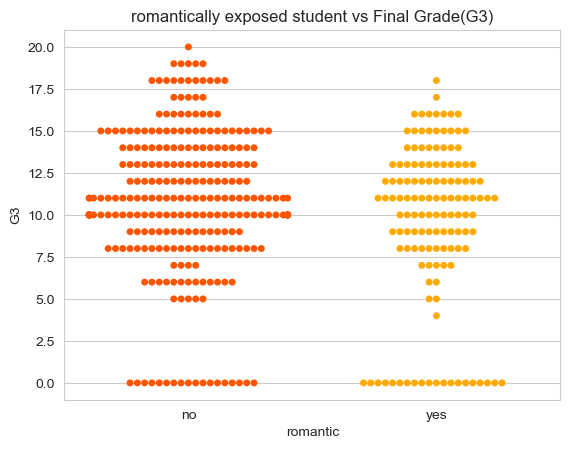

In [44]:
b = sns.swarmplot(x=student_features['romantic'],y=student_target ,palette='autumn')
b.axes.set_title('romantically exposed student vs Final Grade(G3)')
plt.show()

B3. Correlation
I first convert the categorical data into numerical values using an encoding technique like Label encoder within the data using each categorical variable's column index, I then calculated the correlation between the encoded categorical variable and the numerical variable using a statistical method like Pearson correlation coefficient. 


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
student_rec_encoded = student_record
student_rec_encoded.iloc[:,0]=le.fit_transform(student_rec_encoded.iloc[:,0])
student_rec_encoded.iloc[:,1]=le.fit_transform(student_rec_encoded.iloc[:,1])
student_rec_encoded.iloc[:,3]=le.fit_transform(student_rec_encoded.iloc[:,3])
student_rec_encoded.iloc[:,4]=le.fit_transform(student_rec_encoded.iloc[:,4])
student_rec_encoded.iloc[:,5]=le.fit_transform(student_rec_encoded.iloc[:,5])
student_rec_encoded.iloc[:,8]=le.fit_transform(student_rec_encoded.iloc[:,8])
student_rec_encoded.iloc[:,9]=le.fit_transform(student_rec_encoded.iloc[:,9])
student_rec_encoded.iloc[:,10]=le.fit_transform(student_rec_encoded.iloc[:,10])
student_rec_encoded.iloc[:,11]=le.fit_transform(student_rec_encoded.iloc[:,11])
student_rec_encoded.iloc[:,15]=le.fit_transform(student_rec_encoded.iloc[:,15])
student_rec_encoded.iloc[:,16]=le.fit_transform(student_rec_encoded.iloc[:,16])
student_rec_encoded.iloc[:,17]=le.fit_transform(student_rec_encoded.iloc[:,17])
student_rec_encoded.iloc[:,18]=le.fit_transform(student_rec_encoded.iloc[:,18])
student_rec_encoded.iloc[:,19]=le.fit_transform(student_rec_encoded.iloc[:,19])
student_rec_encoded.iloc[:,20]=le.fit_transform(student_rec_encoded.iloc[:,20])
student_rec_encoded.iloc[:,21]=le.fit_transform(student_rec_encoded.iloc[:,21])
student_rec_encoded.iloc[:,22]=le.fit_transform(student_rec_encoded.iloc[:,22])



In [47]:
# checking the correlations against the target G3

strongly_correlated = student_rec_encoded.corr().abs()['G3'].sort_values(ascending=False)
strongly_correlated

G3             1.000000
G2             0.904868
G1             0.801468
failures       0.360415
Medu           0.217147
higher         0.182465
age            0.152762
Fedu           0.152457
goout          0.132791
romantic       0.129970
reason         0.121994
traveltime     0.117142
address        0.105756
sex            0.103456
Mjob           0.102082
paid           0.101996
internet       0.098483
studytime      0.097820
absences_G3    0.086384
schoolsup      0.082788
famsize        0.081407
guardian       0.070109
health         0.061335
Pstatus        0.058009
Dalc           0.054660
Walc           0.051939
nursery        0.051568
famrel         0.051363
school         0.045017
Fjob           0.042286
absences_G2    0.041598
famsup         0.039157
activities     0.016100
freetime       0.011307
absences_G1    0.008686
Name: G3, dtype: float64

In [48]:
twelve_most_correlated = strongly_correlated[:25]
twelve_most_correlated 

G3             1.000000
G2             0.904868
G1             0.801468
failures       0.360415
Medu           0.217147
higher         0.182465
age            0.152762
Fedu           0.152457
goout          0.132791
romantic       0.129970
reason         0.121994
traveltime     0.117142
address        0.105756
sex            0.103456
Mjob           0.102082
paid           0.101996
internet       0.098483
studytime      0.097820
absences_G3    0.086384
schoolsup      0.082788
famsize        0.081407
guardian       0.070109
health         0.061335
Pstatus        0.058009
Dalc           0.054660
Name: G3, dtype: float64

In [49]:
strongly_correlated = student_rec_encoded.corr().abs()['G3'].sort_values(ascending=False)
strongly_correlated

G3             1.000000
G2             0.904868
G1             0.801468
failures       0.360415
Medu           0.217147
higher         0.182465
age            0.152762
Fedu           0.152457
goout          0.132791
romantic       0.129970
reason         0.121994
traveltime     0.117142
address        0.105756
sex            0.103456
Mjob           0.102082
paid           0.101996
internet       0.098483
studytime      0.097820
absences_G3    0.086384
schoolsup      0.082788
famsize        0.081407
guardian       0.070109
health         0.061335
Pstatus        0.058009
Dalc           0.054660
Walc           0.051939
nursery        0.051568
famrel         0.051363
school         0.045017
Fjob           0.042286
absences_G2    0.041598
famsup         0.039157
activities     0.016100
freetime       0.011307
absences_G1    0.008686
Name: G3, dtype: float64

## E. Prepare the Data

### Feature Selection

Based on your data exploration, begin considering the features you want to include in your model. Limiting your data can be beneficial because it reduces complexity and can improve model performance by focusing on the most relevant features.

Create lists below for the columns you want to use in your model based on your exploration above. These features will be used in the column transformer. The list names must match exactly.

- **numeric_columns**: This is your continuous numerical data that MUST include `absences_G1`, `absences_G2`, `absences_G3`, `G1`, and `G2` for use in your custom transformer, in addition to any other numerical columns you want to select. Note: The fact that a column is labeled as an integer or float does not necessarily indicate that it contains continuous data.
- **categorical_columns**: Include at least one categorical column.
- **ordinal_columns**: Include at least one ordinal column.

E1. Feature Selection

In [52]:
### ENTER CODE HERE ###

def selected_features(df):
    df=df[['school','sex','address','famsize','Pstatus','traveltime','studytime','failures','internet','romantic',
           'Dalc','Walc','health','absences_G1','absences_G2','absences_G3','G1','G2']]
    return df

In [53]:


# pass the training_features through selected_features function
X_train_final = selected_features(X_train)


### F. Custom Transformer
We want to create a new column that sums the three absences columns together as a new feature. Additionally, we want to  conditionally keep or drop the grades for the first and second terms based on the parameters passed.

G3 is the final year grade and is highly correlated with G2 and G1, which are grades from the first two terms. Predicting G3 without using G2 and G1 is more challenging but also more valuable since you could make predictions earlier in the year. Therefore, later we will create separate models (one that includes the G1 and G2 columns and one that excludes them) to test this.

#### Instructions for Submission

Create a custom transformer that:

- Inherits from BaseEstimator and TransformerMixin.
- Implements the fit and transform methods.
- Accepts a DataFrame as input. This differs from the California Housing Prices example, which used arrays. We will pass a DataFrame into the custom transformer to allow for easier testing with CodeGrade.
- In the transform method:
    - Create a new column called `absences_sum` that sums the `absences_G1`, `absences_G2`, and `absences_G3` columns, adds the new `absences_sum` column to the end of the DataFrame, then drops the original three absence columns.
    - Drop the `G1` and `G2` columns if the parameter `drop_grades` is `True`. It will keep the columns if `drop_grades` is `False`.
- Name the custom transformer class `FinalProjectTransformer`.

F1. Custom Transformer

In [56]:
class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=False):
        self.drop_grades = drop_grades

    def fit(self, X, y=None):
       return self

    def transform(self, X):           
        # Create the absences_sum column
        X['absences_sum'] = X['absences_G1'] + X['absences_G2'] + X['absences_G3']

        # Drop the original absence columns
        X = X.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'])

        # Conditionally drop G1 and G2 columns
        if self.drop_grades:
            X = X.drop(columns=['G1', 'G2'])

        return X



### Data Pipelines Instructions
Creating data pipelines allows you to automate your data cleaning process, making it easy to apply the same transformations to new data. Follow the outline below to transform your dataset into two sets of transformed data: one with the G1/G2 columns and one without them.

#### Instructions for Submission
- Numeric Pipeline (you'll need to create two to handle the G1/G2 requirement)
  - Impute missing values using SimpleImputer() (use [.set_output(transform="pandas")](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html) to output a DataFrame from your SimpleImputer into your custom transformer) 
  - Transform data using the custom transformer FinalProjectTransformer as appropriate for the task
  - Standardize the data using StandardScalar()
  - Use the following variable names:
    - `numeric_pipeline_with_grades`
    - `numeric_pipeline_without_grades`

- Categorical Pipeline
  - Impute missing values 
  - One-Hot Encode (OHE) categorical data 
  - Use the following variable name:
    - `categorical_pipeline`

- Ordinal Pipeline
  - Impute missing values 
  - Ordinal encode the data
  - Use the following variable name:
    - `ordinal_pipeline`

- Column Transformer (you'll need to create two to handle the two different numeric pipelines)
  - pass in your previously created feature selection lists
  - Combine the numeric, categorical, and ordinal pipelines
  - Use the following variable names:
    - `column_transformer_with_grades`
    - `column_transformer_without_grades`
    
Once the full pipeline is set up, fit and transform `X_train`, saving the results as `X_train_transformed_with_grades` and `X_train_transformed_without_grades`. Confirm that the transformed data without grades has two fewer columns.

F2. Create Pipeline

F21 - Continuous Numeric attributes

In [60]:

numeric_columns=['traveltime','studytime','failures','Dalc','Walc','health','absences_G1',
               'absences_G2','absences_G3','G1','G2'] ### numerical attributes from the selected features



In [61]:
# Pipeline that executes data transformation for our numerical attributes. 
numeric_pipeline_with_grades = Pipeline([
        ('imputer', SimpleImputer(strategy="median").set_output(transform="pandas")), 
        ('custom_transformer', FinalProjectTransformer( drop_grades = False)),
        ('std_scaler', StandardScaler()), 
    ])

In [62]:


# Create another pipeline in which "drop_columns" of the custom transformer is set to False. This will be used to compare 
#the performance of our models later on.

numeric_pipeline_without_grades = Pipeline([
        ('imputer', SimpleImputer(strategy="median").set_output(transform='pandas')), 
        ('custom_transformer', FinalProjectTransformer( drop_grades=True)),
        ('std_scaler', StandardScaler()), 
    ])

F22 - One-Hot encode on nominal or categorical data

In [64]:
# List of categorical attributes
categorical_columns = ['school','sex','address','Pstatus','internet','romantic']



# Create a pipeline to prepare our nominal data 
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(drop='first',sparse_output=False))



F23 -  Ordinal attributes

In [66]:
# Separate the ordinal attribute from our data
ordinal_columns=['famsize']

# Create a pipeline to prepare our ordinal data 
ordinal_pipeline= make_pipeline(SimpleImputer(strategy='most_frequent'),OrdinalEncoder())

F24-  Column Transformer

In [68]:
column_transformer_without_grades = ColumnTransformer([("num_without_G1G2", numeric_pipeline_without_grades, numeric_columns),
                                        ('cat1_nominal',categorical_pipeline, categorical_columns),('cat2_ordinal',ordinal_pipeline, ordinal_columns)])
column_transformer_without_grades


ColumnTransformer(transformers=[('num_without_G1G2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('custom_transformer',
                                                  FinalProjectTransformer(drop_grades=True)),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['traveltime', 'studytime', 'failures', 'Dalc',
                                  'Walc', 'health', 'absences_G1',
                                  'absences_G2', 'absences_G3', 'G1', 'G2']),
                                ('cat1_nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['school', 'sex', 'address', 'Pstatus',
                                  'internet', 'romantic']),
                                ('cat2_ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['famsize'])])

In [69]:
# We are passing the "num_pipeline2" pipeline which contains our custom transformer with G1 and G2 grades included in our training data.
column_transformer_with_grades = ColumnTransformer([("num_with_G1G2", numeric_pipeline_with_grades, numeric_columns),
                                    ('cat1_nominal',categorical_pipeline, categorical_columns),('cat2_ordinal',ordinal_pipeline, ordinal_columns)])
column_transformer_with_grades

ColumnTransformer(transformers=[('num_with_G1G2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('custom_transformer',
                                                  FinalProjectTransformer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['traveltime', 'studytime', 'failures', 'Dalc',
                                  'Walc', 'health', 'absences_G1',
                                  'absences_G2', 'absences_G3', 'G1', 'G2']),
                                ('cat1_nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['school', 'sex', 'address', 'Pstatus',
                                  'internet', 'romantic']),
                                ('cat2_ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['famsize'])])

F25 - Fit and Transform training data

In [71]:
X_train_final

,school,sex,address,famsize,Pstatus,traveltime,studytime,failures,internet,romantic,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
181,GP,M,U,GT3,T,1,2,0,yes,yes,1,2,3,0.0,0.0,2.0,12,13
194,GP,M,U,GT3,T,2,1,0,yes,no,1,1,3,0.0,0.0,0.0,13,14
173,GP,F,U,GT3,T,1,2,3,yes,yes,1,1,3,0.0,0.0,0.0,8,7
63,GP,F,U,GT3,T,1,3,0,yes,no,2,4,4,0.0,0.0,2.0,10,9
253,GP,M,R,GT3,T,2,1,0,no,no,1,3,3,0.0,0.0,0.0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,U,GT3,T,1,4,0,yes,no,1,1,3,0.0,1.0,0.0,10,10
106,GP,F,U,GT3,T,1,4,0,yes,no,1,1,3,NaN,0.0,5.0,7,8
270,GP,F,U,GT3,T,1,2,2,yes,no,3,3,5,2.0,4.0,11.0,9,9
348,GP,F,U,GT3,T,1,3,0,yes,yes,1,3,4,0.0,1.0,0.0,13,15


In [72]:
X_train_transformed_with_grades  = column_transformer_with_grades.fit_transform(X_train_final)

In [73]:
X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train_final)


## G.Shortlist Promising Models
In this section, you will fit and compare three regression models to your transformed data, both with and without the G1/G2 columns, using cross-validation. Follow the steps below, using the specified variable names.

1) **Initialize Three Regression Models**
- Linear Regression
- Support Vector Machine (SVM) Regression
- Lasso Regression

2) **Compare Models with Cross-Validation**
- Using the above models, perform cross-validation on each model using both sets of transformed data (with and without G1/G2 columns).

### Instructions for Submission
1) **Initialize the Models**: Instantiate a Linear Regression, SVM Regression, and Lasso Regression model.
  - Use the specified variable names for the respective models:
    - `lin_reg`
    - `svm_reg`
    - `lasso_reg`
2) **Cross-Validation**: Using both sets of transformed data (with and without G1/G2 columns), perform 3-fold cross-validation for each model using RMSE as the metric.
  - You will run cross-validation six times (e.g., cross-validation of the linear regression model with the G1/G2 data, cross-validation of the linear regression model without the G1/G2 data, etc.)
  - Use the specified variable names to save each respective array of scores:
    - `cv_scores_lin_reg_with_grades`
    - `cv_scores_lin_reg_without_grades`
    - `cv_scores_svm_with_grades`
    - `cv_scores_svm_without_grades`
    - `cv_scores_lasso_with_grades`
    - `cv_scores_lasso_without_grades`
  - Use the specified variable names to save the mean of each cross-validation array and print it to view your mean scores:
    - `rmse_lin_reg_with_grades`
    - `rmse_lin_reg_without_grades`
    - `rmse_svm_with_grades`
    - `rmse_svm_without_grades`
    - `rmse_lasso_with_grades`
    - `rmse_lasso_without_grades`

*You are welcome to test and fit more regression models as long as the above three are included and named appropriately*

G1. Fit model

G11. Initialize the Models:

In [77]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

lin_reg = LinearRegression()
svm_reg = SVR()
lasso_reg = Lasso()

G12.Cross-validation of the linear regression models with the G1/G2 data, and cross-validation of the linear regression model without the G1/G2 data.

In [79]:
cv_scores_lin_reg_with_grades = np.sqrt(-cross_val_score(lin_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error'))
cv_scores_lin_reg_without_grades = np.sqrt(-cross_val_score(lin_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error'))

# SVM Regression
cv_scores_svm_with_grades = np.sqrt(-cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error'))
cv_scores_svm_without_grades = np.sqrt(-cross_val_score(svm_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error'))

# Lasso Regression
cv_scores_lasso_with_grades = np.sqrt(-cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error'))
cv_scores_lasso_without_grades = np.sqrt(-cross_val_score(lasso_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error'))

In [80]:
rmse_lin_reg_with_grades = np.mean(cv_scores_lin_reg_with_grades)
rmse_lin_reg_without_grades = np.mean(cv_scores_lin_reg_without_grades)
rmse_svm_with_grades = np.mean(cv_scores_svm_with_grades)
rmse_svm_without_grades = np.mean(cv_scores_svm_without_grades)
rmse_lasso_with_grades = np.mean(cv_scores_lasso_with_grades)
rmse_lasso_without_grades = np.mean(cv_scores_lasso_without_grades)

print("RMSE Linear Regression with grades:", rmse_lin_reg_with_grades)
print("RMSE Linear Regression without grades:", rmse_lin_reg_without_grades)
print("RMSE SVM with grades:", rmse_svm_with_grades)
print("RMSE SVM without grades:", rmse_svm_without_grades)
print("RMSE Lasso with grades:", rmse_lasso_with_grades)
print("RMSE Lasso without grades:", rmse_lasso_without_grades)

RMSE Linear Regression with grades: 1.87727595016156
RMSE Linear Regression without grades: 4.341294965965875
RMSE SVM with grades: 2.5942967076025836
RMSE SVM without grades: 4.322886584469555
RMSE Lasso with grades: 2.169051437265221
RMSE Lasso without grades: 4.386455909382055


## Fine-Tune the System
In this section, you will use the Support Vector Machine (SVM) regression model and perform grid search to fine-tune its hyperparameters. Follow the steps below to set up the grid search, ensuring you use the specified variable names for automatic grading through CodeGrade.

1) Set Up Grid Search for SVM Regression
  - Define a parameter grid to search over. Review Scikit-learn's documentation for the available hyperparameters for this algorithm.
  - Use GridSearchCV to find the best hyperparameters.
  - Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.

### Instructions for Submission

1) **Define Parameter Grid**: Set up a parameter grid for the SVM regression model name `param_grid`.
2) **Initialize Grid Search**: Initialize the `GridSearchCV` and call this `grid_search`.
3) **Fit the Grid Search**: Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.
4) **Save & Print Best Parameters**: Save the best parameters for each respective fit to `best_params_with_grades` and `best_params_without_grades`, and print them.
5) **Print Best Score**: Use the `best_score_` attribute to view the mean cross-validated score for each respective best_estimator
  
<span style="color:red">Codegrade has a runtime limit of 5 minutes. If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error. Limiting the number of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

In [82]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear']
    }

# Initialize Grid Search
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data with G1/G2 columns
grid_search.fit(X_train_transformed_with_grades, y_train)
best_params_with_grades = grid_search.best_params_
best_score_with_grades = grid_search.best_score_

# Print the best parameters and score for the dataset with G1/G2 columns
print("Best parameters with G1/G2 columns:", best_params_with_grades)
print("Best score with G1/G2 columns:", best_score_with_grades)

# Fit the grid search to the training data without G1/G2 columns
grid_search.fit(X_train_transformed_without_grades, y_train)
best_params_without_grades = grid_search.best_params_
best_score_without_grades = grid_search.best_score_

# Print the best parameters and score for the dataset without G1/G2 columns
print("Best parameters without G1/G2 columns:", best_params_without_grades)
print("Best score without G1/G2 columns:", best_score_without_grades)

Best parameters with G1/G2 columns: {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
Best score with G1/G2 columns: -3.838131308710196
Best parameters without G1/G2 columns: {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
Best score without G1/G2 columns: -18.756645568660723


In [83]:
svm_best = SVR( C = 0.1, degree = 1, epsilon = 0.5, kernel = 'linear')

cv_scores_svm_with_grades = np.sqrt(-cross_val_score(svm_best, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error'))
cv_scores_svm_without_grades = np.sqrt(-cross_val_score(svm_best, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error'))

rmse_svm_best_with_grades = np.mean(cv_scores_svm_with_grades)
rmse_svm_best_without_grades = np.mean(cv_scores_svm_without_grades)

print("RMSE SVM with grades:", rmse_svm_best_with_grades)
print("RMSE SVM without grades:", rmse_svm_best_without_grades)

RMSE SVM with grades: 1.971922596613532
RMSE SVM without grades: 4.345405122046125


Observation: Other things being equal, The model with the lowest RMSE is generally considered the best performer:
Linear Regression has the lowest RMSE

In [85]:
#Fitting the best model
best_model_with_grades = LinearRegression() #best_model_with_grades 
best_model_with_grades.fit(X_train_transformed_with_grades, y_train)


LinearRegression()

In [86]:
best_model_without_grades = LinearRegression()
best_model_without_grades.fit(X_train_transformed_without_grades, y_train)

LinearRegression()

## Measure Performance on Test Set
In this section, you will transform the test set using your full pipeline and measure the performance of your best model on the test set. Follow the steps below, using the specified variable names for automatic grading through CodeGrade.

1) Based on all previous cross-validation results, pick your best model.
2) Use the previously created column transformers to transform the test set, both with and without the G1/G2 columns.
3) Using your best model, measure its performance on the test set to estimate the generalization error.
  
### Instructions for Submission
1) **Fit Best Model**: If you haven't already, fit your best model to both sets of your transformed training data. 
2) **Transform the Test Set**: Use your column transformers to transform the test set (`X_test`), both with and without the G1/G2 columns. Name these transformed datasets `X_test_transformed_with_grades` and `X_test_transformed_without_grades`.
3) **Evaluate Performance**: Measure the performance of your best-fitted models on the transformed test sets using Root Mean Squared Error (RMSE) and R-squared (R²) metrics. Save these variables as:
  - `rmse_with_grades`
  - `r2_with_grades`
  - `rmse_without_grades`
  - `r2_without_grades`

In [88]:
from sklearn.metrics import r2_score

X_test_final = selected_features(X_test)

# Fit our column transformer with 'G1'and 'G2' included to our training data

X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train_final)
X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train_final)

# Transform the test set
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test_final)
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test_final)

# Predict using the best model
y_pred_with_grades = best_model_with_grades.predict(X_test_transformed_with_grades)
y_pred_without_grades = best_model_without_grades.predict(X_test_transformed_without_grades)

# Calculate RMSE and R^2 for the test set with grades
rmse_with_grades = np.sqrt(mean_squared_error(y_test, y_pred_with_grades))
r2_with_grades = r2_score(y_test, y_pred_with_grades)

# Calculate RMSE and R^2 for the test set without grades
rmse_without_grades = np.sqrt(mean_squared_error(y_test, y_pred_without_grades))
r2_without_grades = r2_score(y_test, y_pred_without_grades)

# Print the results
print(f"RMSE with grades: {rmse_with_grades}")
print(f"R^2 with grades: {r2_with_grades}")
print(f"RMSE without grades: {rmse_without_grades}")
print(f"R^2 without grades: {r2_without_grades}")

RMSE with grades: 2.1829592239190574
R^2 with grades: 0.7676030242215216
RMSE without grades: 4.3520103777287495
R^2 without grades: 0.07632525396050438


In [89]:
y_pred_with_grades[:3].round(2)

array([ 6.37, 11.87,  3.12])

In [90]:
y_test.iloc[:3].values

array([10, 12,  5], dtype=int64)


Final model performance measure on test set

In [92]:


final_rmse_with_grades = mean_squared_error(y_test, y_pred_with_grades, squared=False)
print(f"final_rmse_with_grades:  {final_rmse_with_grades}") 



final_rmse_without_grades = mean_squared_error(y_test, y_pred_without_grades, squared=False)
print(f"final_rmse_without_grades:  {final_rmse_without_grades}") 



final_rmse_with_grades:  2.1829592239190574
final_rmse_without_grades:  4.3520103777287495


 Observation and Conclusion: Our RMSE value is on test set is the same as our Model rmse Value which means that our model can successfully predict new dataset 


<span style="color:red">Codegrade has a runtime limit of 5 minutes.  If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error.  Limiting the amount of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

## Next Steps
Once you complete all the steps above, you will:

1) Upload your `final_project.ipynb` to the **Final Project Notebook Submission** link in Brightspace to check your work.
2) After passing all unit tests in the automatic grading, finalize your **Executive Summary** document using the student instructions.
3) Submit the **DTSC670_ExecutiveSummary_YourName** document through the **Final Project Executive Summary** submission link.

<span style='color:red'>**BOTH** parts of this project must be completed and submitted to earn a grade.</span>

<span style='color:red'>Submit your Executive Summary only **AFTER** submitting your final autograded notebook to CodeGrade and are satisfied with your score. Your CodeGrade submission score will be used to evaluate your overall project. Note that any CodeGrade submissions made after the Executive Summary has been submitted will not be considered.
</span>

# D Final Project
## Part 1: Technical Implementation

### Name: Akeem Asiru